In [2]:
import pandas as pd
import math
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv',sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
df.columns.values

array(['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'], dtype=object)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [6]:
# data has no missing/null values


In [7]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [8]:
df.quality.unique()

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

In [9]:
df.quality.value_counts()

quality
6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: count, dtype: int64

## To check the missing values

<Axes: >

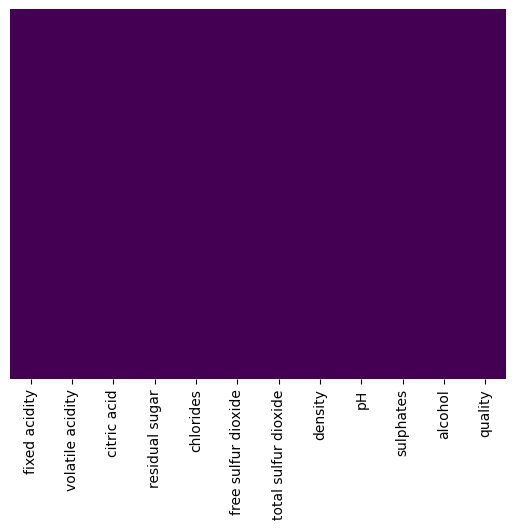

In [10]:
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap='viridis')

### This plot shows that there are no any missing values

## To check Correlation

<Axes: >

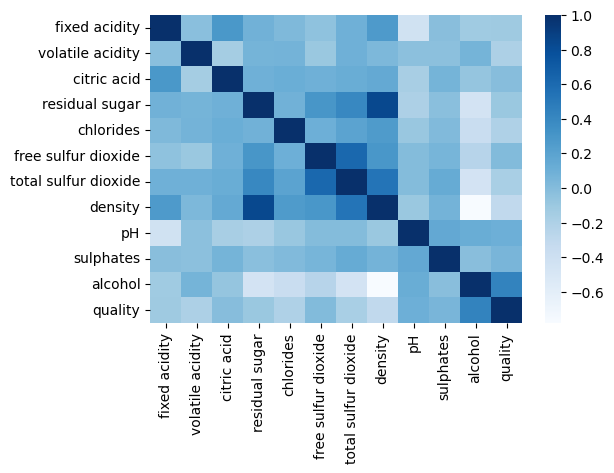

In [11]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(),cmap='Blues',annot=False)

# df.corr = each cell in the table is showing the correlation between the two variables
# cmap= basically it is the shades of the colour 
# annot is the basically used to show the correlation coefficients if it is True then it will show the values of the correlation coefficient


In [12]:
# Dark shades represents positive correlation

In [19]:
# Quality correlation matrix

k = 12 # no of variable for heatmap
cols = df.corr().nlargest(k,'quality')['quality'].index
cols

# .nlargest(k,'quality')  selects the top k variable that has highest correlation with the quality
#['quality'].index: Retrieves the index (column names) of these top k correlated variables

Index(['quality', 'alcohol', 'pH', 'sulphates', 'free sulfur dioxide',
       'citric acid', 'residual sugar', 'fixed acidity',
       'total sulfur dioxide', 'volatile acidity', 'chlorides', 'density'],
      dtype='object')

In [16]:
cm= df[cols].corr()
cm

,quality,alcohol,pH,sulphates,free sulfur dioxide,citric acid,residual sugar,fixed acidity,total sulfur dioxide,volatile acidity,chlorides,density
quality,1.000000,0.435575,0.099427,0.053678,0.008158,-0.009209,-0.097577,-0.113663,-0.174737,-0.194723,-0.209934,-0.307123
alcohol,0.435575,1.000000,0.121432,-0.017433,-0.250104,-0.075729,-0.450631,-0.120881,-0.448892,0.067718,-0.360189,-0.780138
pH,0.099427,0.121432,1.000000,0.155951,-0.000618,-0.163748,-0.194133,-0.425858,0.002321,-0.031915,-0.090439,-0.093591
sulphates,0.053678,-0.017433,0.155951,1.000000,0.059217,0.062331,-0.026664,-0.017143,0.134562,-0.035728,0.016763,0.074493
free sulfur dioxide,0.008158,-0.250104,-0.000618,0.059217,1.000000,0.094077,0.299098,-0.049396,0.615501,-0.097012,0.101392,0.294210
citric acid,-0.009209,-0.075729,-0.163748,0.062331,0.094077,1.000000,0.094212,0.289181,0.121131,-0.149472,0.114364,0.149503
residual sugar,-0.097577,-0.450631,-0.194133,-0.026664,0.299098,0.094212,1.000000,0.089021,0.401439,0.064286,0.088685,0.838966
fixed acidity,-0.113663,-0.120881,-0.425858,-0.017143,-0.049396,0.289181,0.089021,1.000000,0.091070,-0.022697,0.023086,0.265331
total sulfur dioxide,-0.174737,-0.448892,0.002321,0.134562,0.615501,0.121131,0.401439,0.091070,1.000000,0.089261,0.198910,0.529881
volatile acidity,-0.194723,0.067718,-0.031915,-0.035728,-0.097012,-0.149472,0.064286,-0.022697,0.089261,1.000000,0.070512,0.027114


<Axes: >

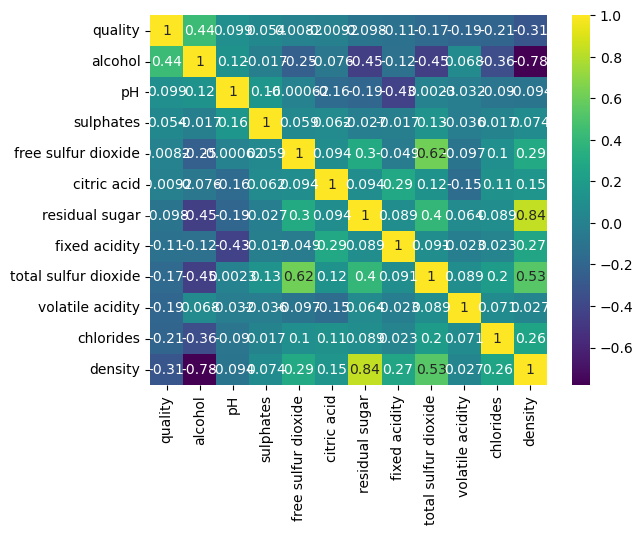

In [19]:
sns.heatmap(cm,annot = True,cmap='viridis')

In [20]:
# here we can see density has strong positive correlation with residual sugar
# neg corr = density with alcohol

In [21]:
# free sulphur oxide and citric acid almost no correlation with quality


C:\Users\Aditya\AppData\Local\Temp\ipykernel_5828\2621137056.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Aditya\AppData\Local\Temp\ipykernel_5828\2621137056.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Aditya\AppData\Local\Temp\ipykernel_5828\2621137056.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Aditya\AppData\Local\Temp\ipykernel_5828\2621137056.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Aditya\AppData\Local\Temp\ipykernel_5828\2621137056.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Aditya\AppData\Local\Temp\ipykernel_5828\2621137056.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Aditya\AppData\Local\Temp\ipykernel_5828\2621137056.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Aditya\AppD

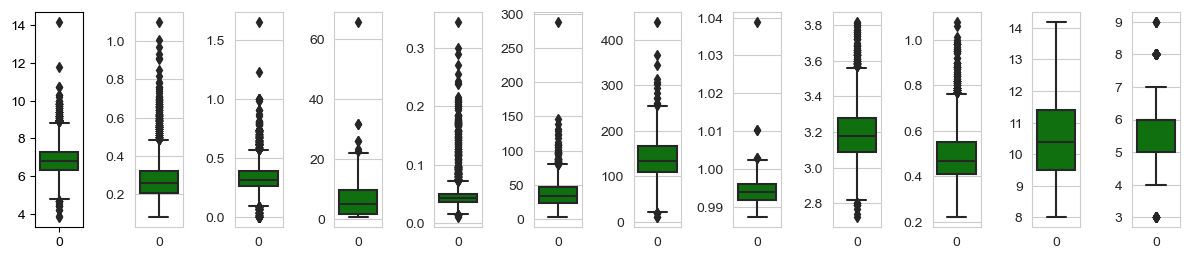

In [28]:
l = df.columns.values
number_of_columns=12
number_of_rows = math.ceil((len(l)-1)/number_of_columns)
plt.figure(figsize=(number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(df[l[i]],color='green',orient='v')
    plt.tight_layout()

In [23]:
plt.figure(figsize=(2*number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.distplot(df[l[i]],kde=True) 

ValueError: Number of rows must be a positive integer, not 12.916666666666666

<Figure size 2400x5958.33 with 0 Axes>